# We can predict

Forecast hourly power consumption for the next day
Forecast daily power consumption for the next week
Forecast weekly power consumption for the next month
Forecast monthly power consumption for the next year
input-frequency -----> output

[week1] ------> next week

[monthly] --------> next month

[yearly] ------------> next year

[daily] ---------> next day

we can also do multistep ahead prediction [input week1] ----> week2 -----> week3 ---- >

In [1]:
import pandas as pd

path = r"C:\Users\Andrew\Documents\Project\Time Series\Kepco-Search\dataset\Household_power_consumption\household_power_consumption.txt"
df = pd.read_csv(path, sep=';',
                 parse_dates={'dt': ['Date', 'Time']},
                 infer_datetime_format=True,
                 low_memory=False, na_values=['nan', '?'],
                 index_col='dt')

In [2]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
droping_list_all = []
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)

In [4]:
for j in range(0, 7):
    df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())

In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [6]:
df.shape

(2075259, 7)

In [7]:
import numpy as np


# filling missing values by the value of one day before
def fill_missing(data):
    one_day = 23 * 60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row, col]):
                data[row, col] = data[row - one_day, col]

In [9]:
fill_missing(df.values)

df.isna().sum()  # no nan values

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
data = df.resample('D').sum()  #all the units of particular day

In [12]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [11]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


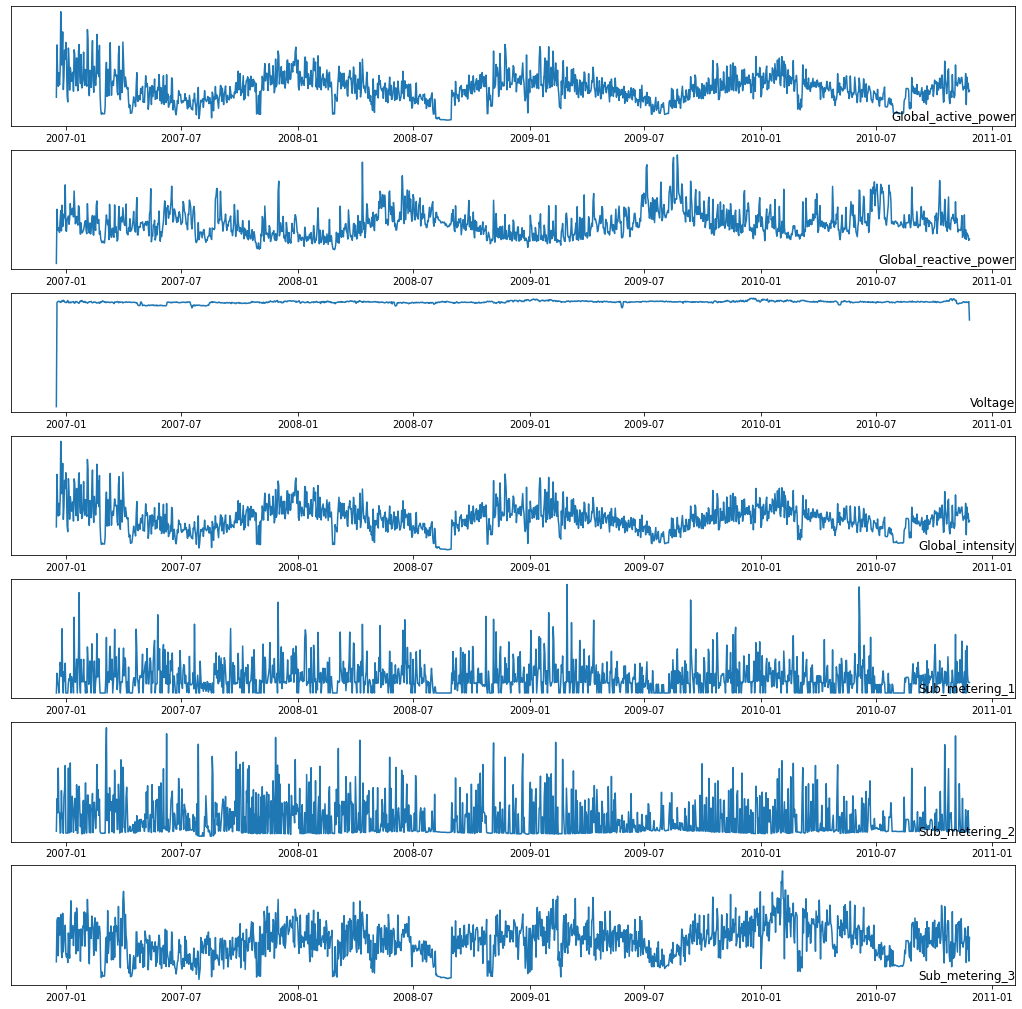

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(18, 18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i + 1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

C:\Users\Andrew\AppData\Local\Temp/ipykernel_6856/4054373210.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  active_power_data = data[str(year)]['Global_active_power']


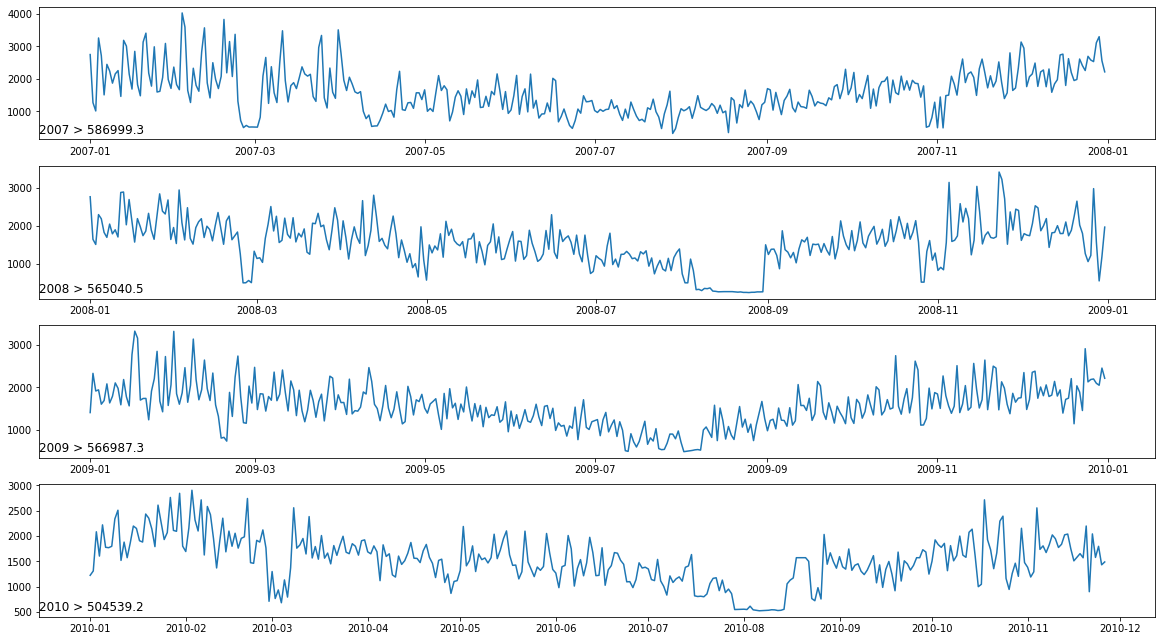

In [16]:
# now lets plot the active power per year
years = ['2007', '2008', '2009', '2010']
fig, ax = plt.subplots(figsize=(20, 20))

for i in range(len(years)):
    plt.subplot(len(data.columns), 1, i + 1)
    year = years[i]
    active_power_data = data[str(year)]['Global_active_power']
    plt.plot(active_power_data)
    plt.title(str(year) + " > " + str(np.round(active_power_data.sum(), 1)), y=0, loc='left')
plt.show()
fig.tight_layout()

In [19]:
data['2006']

C:\Users\Andrew\AppData\Local\Temp/ipykernel_6856/2461987659.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2006']


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.17600,34.922000,93552.530000,5180.800000,0.000000,546.00000,4926.000000
2006-12-17,3390.46000,226.006000,345725.320000,14398.600000,2033.000000,4187.00000,13341.000000
2006-12-18,2203.82600,161.792000,347373.640000,9247.200000,1063.000000,2621.00000,14018.000000
2006-12-19,1666.19400,150.942000,348479.010000,7094.000000,839.000000,7602.00000,6197.000000
2006-12-20,2225.74800,160.998000,348923.610000,9313.000000,0.000000,2648.00000,14063.000000
2006-12-21,1718.80723,144.413429,347097.989716,7247.855519,1767.243847,2625.59704,10433.916895
2006-12-22,2341.33800,186.906000,347305.750000,9897.000000,3151.000000,350.00000,11131.000000
2006-12-23,4773.38600,221.470000,345795.950000,20200.400000,2669.000000,425.00000,14726.000000
2006-12-24,2550.01200,149.900000,348029.910000,11002.200000,1703.000000,5082.00000,6891.000000


# 1.Building the L.S.T.M model (Vector Output Model)¶

In [1]:
from utils import HouseholdDataLoader

dataload = HouseholdDataLoader()
data = dataload.data_by_days



2022-06-09 02:55:14.778720: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


In [43]:

from sklearn.model_selection import train_test_split
import numpy as np


class TSF_Data:
    """
    This class only support to prepare training (backup to TSF class)
    """

    def __init__(self, data, input_width: int, output_width: int, shift=1, batch_size=32, train_ratio=None, shuffle=False):
        self.data_train = None
        self.data_test = None
        self.raw_data = data
        self.input_width = input_width
        self.output_width = output_width
        self.shift = shift
        self.batch_size = batch_size
        self.shuffle = shuffle

        self.split_data(train_ratio)
        self.data_train = self.build_tsd(self.X_train)
        self.data_valid = self.build_tsd(self.X_valid)
        if self.X_test is not None:
            self.data_test = self.build_tsd(self.X_test)
        else:
            self.data_test = None

        self.normalize_data()

    def split_data(self, train_ratio):
        self.X_test = None  # No testing, using whole data to train
        X_train = self.raw_data
        if train_ratio is not None:
            X_train, self.X_test = train_test_split(
                self.raw_data, train_size=train_ratio, shuffle=self.shuffle)
        self.X_train, self.X_valid = train_test_split(
            X_train, train_size=0.9, shuffle=self.shuffle)

    def normalize_data(self):
        """The mean and standard deviation should only be computed using the training data so that the models
        have no access to the values in the validation and test sets."""
        train_mean0 = self.data_train[0].mean()
        train_std0 = self.data_train[0].std() 
        train_mean1 = self.data_train[1].mean()
        train_std1 = self.data_train[1].std()
        
        self.data_train = (self.data_train[0] - train_mean0) / train_std0, (self.data_train[1] - train_mean1) / train_std1
        self.data_valid = (self.data_valid[0] - train_mean0) / train_std0, (self.data_valid[1] - train_mean1) / train_std1
        # self.data_test = (self.data_test[0] - train_mean0) / train_std0, (self.data_test[1] - train_mean1) / train_std1
        self.data_train = self.data_train[0][...,np.newaxis], self.data_train[1]
        self.data_valid = self.data_valid[0][...,np.newaxis], self.data_valid[1]
        # self.data_test = self.data_test[0][...,np.newaxis], self.data_test[1]

        # from sklearn.preprocessing import MinMaxScaler
        # scaler_x = MinMaxScaler()
        # scaler_x.fit(self.data_train[0])
        # scaler_y = MinMaxScaler()
        # scaler_y.fit(self.data_train[1])
        # self.data_train = scaler_x.transform(
        #     self.data_train[0]), scaler_y.transform(self.data_train[1])
        # self.data_train = self.data_train[0][...,
        #                                      np.newaxis], self.data_train[1]
        # self.data_valid = scaler_x.transform(
        #     self.data_valid[0]), scaler_y.transform(self.data_valid[1])
        # self.data_valid = self.data_valid[0][...,
        #                                      np.newaxis], self.data_valid[1]
        # if self.data_test is not None:
        #     self.data_test = scaler_x.transform(
        #         self.data_test[0]), scaler_y.transform(self.data_test[1])
        #     self.data_test = self.data_test[0][...,
        #                                        np.newaxis], self.data_test[1]

    def build_tsd(self, data):
        X_data, y_label = [], []

        for i in range(self.input_width, len(data) - self.output_width):
            X_data.append(data[i - self.input_width:i])
            y_label.append(data[i:i + self.output_width])

        X_data, y_label = np.array(X_data), np.array(y_label)

        # converting into L.S.T.M format
        # X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)

        # here our y_train is not in 3D structure
        # y_label = y_label.reshape(y_label.shape[0], y_label.shape[1])
        return X_data, y_label


tsf = TSF_Data(data=data['Global_active_power'],
               input_width=21,
               output_width=7)


In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import Sequential
from keras.layers import Dense, LSTM

model_uni = Sequential()
model_uni.add(LSTM(200, return_sequences=True, activation='relu',
              input_shape=(tsf.data_train[0].shape[1], 1)))
model_uni.add(LSTM(150))
model_uni.add(Dense(7))

print(model_uni.summary())
model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_uni = model_uni.fit(x=tsf.data_train[0],
                            y=tsf.data_train[1],
                            epochs=100, validation_data=tsf.data_valid,
                            batch_size=32,
                            callbacks=callbacks)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 21, 200)           161600    
                                                                 
 lstm_17 (LSTM)              (None, 150)               210600    
                                                                 
 dense_8 (Dense)             (None, 7)                 1057      
                                                                 
Total params: 373,257
Trainable params: 373,257
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
40/40 [==============================] - 3s 51ms/step - loss: 0.7281 - accuracy: 0.1474 - val_loss: 0.4224 - val_accuracy: 0.1538 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 2s 42ms/step - loss: 0.6572 - accuracy: 0.1284 - val_loss: 0.4200 - val_accuracy: 0.1624 - lr: 0.00

In [32]:
from utils import HouseholdDataLoader

dataload = HouseholdDataLoader()
data = dataload.data_by_days

data_ = data['Global_active_power']
data_test = data_['2010']
data_train = data_.loc[:'2009-12-31']

X_train, y_train = [], []

for i in range(21, len(data_train) - 7):
    X_train.append(data_train[i - 21:i])
    y_train.append(data_train[i:i + 7])

import numpy as np
X_train,y_train = np.array(X_train),np.array(y_train)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
#
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)

# converting into L.S.T.M format
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

# here our y_train is not in 3D structure
y_train = y_train.reshape(y_train.shape[0],y_train.shape[1])

In [33]:
print(X_train.shape,y_train.shape)

(1084, 21, 1) (1084, 7)


In [34]:
print(X_train.shape,y_train.shape)

(1084, 21, 1) (1084, 7)


In [35]:
## we would use Xval y_val in our training process to check our error over epochs
X_valid = X_train[:10]
y_valid = y_train[:10]
X_train = X_train[10:]
y_train = y_train[10:]

In [36]:
from keras import Sequential
from keras.layers import Dense, LSTM

model_uni = Sequential()
model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(X_train.shape[1], 1)))
model_uni.add(LSTM(150))
model_uni.add(Dense(7))

print(model_uni.summary())
model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 21, 200)           161600    
                                                                 
 lstm_17 (LSTM)              (None, 150)               210600    
                                                                 
 dense_8 (Dense)             (None, 7)                 1057      
                                                                 
Total params: 373,257
Trainable params: 373,257
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_uni = model_uni.fit(X_train, y_train, epochs=100,validation_data=(X_valid,y_valid), batch_size=32, callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 4s 69ms/step - loss: 0.0332 - accuracy: 0.1490 - val_loss: 0.0286 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 2/100
34/34 [==============================] - 2s 59ms/step - loss: 0.0179 - accuracy: 0.1490 - val_loss: 0.0270 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/100
34/34 [==============================] - 2s 61ms/step - loss: 0.0174 - accuracy: 0.1499 - val_loss: 0.0283 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/100
34/34 [==============================] - 2s 61ms/step - loss: 0.0177 - accuracy: 0.1434 - val_loss: 0.0264 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 5/100
34/34 [==============================] - 2s 60ms/step - loss: 0.0169 - accuracy: 0.1527 - val_loss: 0.0292 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 6/100
34/34 [==============================] - 2s 60ms/step - loss: 0.0169 - accuracy: 0.1536 - val_loss: 0.0261 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 7/100
34/34 [==============================] - 2s 59ms/step - lo

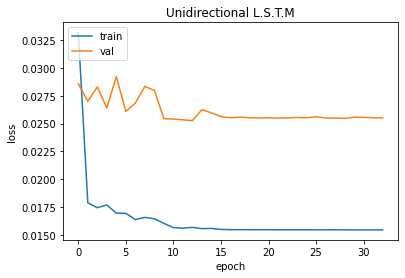

In [38]:
from matplotlib import pyplot as plt
plt.plot(history_uni.history['loss'])
plt.plot(history_uni.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Unidirectional L.S.T.M')
plt.show()

In [1]:
from utils import TSF
from utils import HouseholdDataLoader

dataload = HouseholdDataLoader()
data = dataload.data_by_days
input_width = 21
label_width = 7
tsf = TSF(data['Global_active_power'], batch_size=32, shift=1, shuffle=False, input_width=input_width,
          label_width=label_width)

2022-05-29 16:42:47.650038: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


NameError: name 'data' is not defined

In [31]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(input_width, 1)))
model.add(LSTM(150))
model.add(Dense(7))

print(model.summary())
model.compile(optimizer='adam', loss='mse')

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_uni = model.fit(tsf.train, epochs=100,validation_data=tsf.val, callbacks=callbacks)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 21, 200)           161600    
                                                                 
 lstm_15 (LSTM)              (None, 150)               210600    
                                                                 
 dense_7 (Dense)             (None, 1)                 151       
                                                                 
Total params: 372,351
Trainable params: 372,351
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
31/31 [==============================] - 4s 71ms/step - loss: 0.7521 - accuracy: 0.0000e+00 - val_loss: 0.4193 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - 2s 60ms/step - loss: 0.6302 - accuracy: 0.0000e+00 - val_loss: 0.3833 - val_accuracy: 0.000